In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2023-01-11 16:07:43.842831: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-11 16:07:43.842851: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
tf.__version__

'2.8.0'

In [3]:
keras.__version__

'2.8.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape
X_train_full.dtype


dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

2023-01-11 16:07:45.443581: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-11 16:07:45.443604: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-11 16:07:45.443631: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (icunicamp-Vostro-3500-02): /proc/driver/nvidia/version does not exist
2023-01-11 16:07:45.443815: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers
model.layers[0].name

'flatten'

In [12]:
weights = model.layers[1].get_weights()

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7255 - accuracy: 0.7635 - val_loss: 0.5267 - val_accuracy: 0.8170
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4893 - accuracy: 0.8284 - val_loss: 0.4490 - val_accuracy: 0.8458
Epoch 3/30
1719/1719 [==============================] - 2s 914us/step - loss: 0.4459 - accuracy: 0.8422 - val_loss: 0.4628 - val_accuracy: 0.8372
Epoch 4/30
1719/1719 [==============================] - 2s 914us/step - loss: 0.4186 - accuracy: 0.8536 - val_loss: 0.4052 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 2s 926us/step - loss: 0.3987 - accuracy: 0.8603 - val_loss: 0.3880 - val_accuracy: 0.8668
Epoch 6/30
1719/1719 [==============================] - 2s 906us/step - loss: 0.3814 - accuracy: 0.8654 - val_loss: 0.3917 - val_accuracy: 0.8666
Epoch 7/30
1719/1719 [==============================] - 2s 907us/step - loss: 0.3687 - accuracy: 0.8693 - val_loss: 0.3678 - val

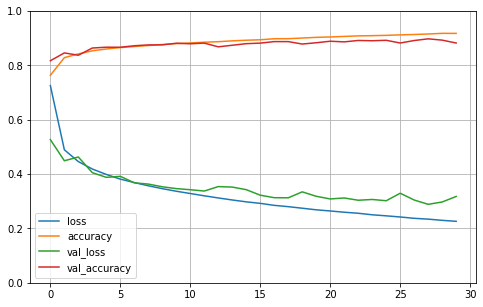

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 787us/step - loss: 58.5307 - accuracy: 0.8559


[58.53069305419922, 0.85589998960495]

In [17]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1])

In [19]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [20]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)